In [24]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [25]:
os.chdir(r"C:\Users\Raya\OneDrive\Documents\3-CSAI\CSAI-Y3-S2\Thesis\Replication")

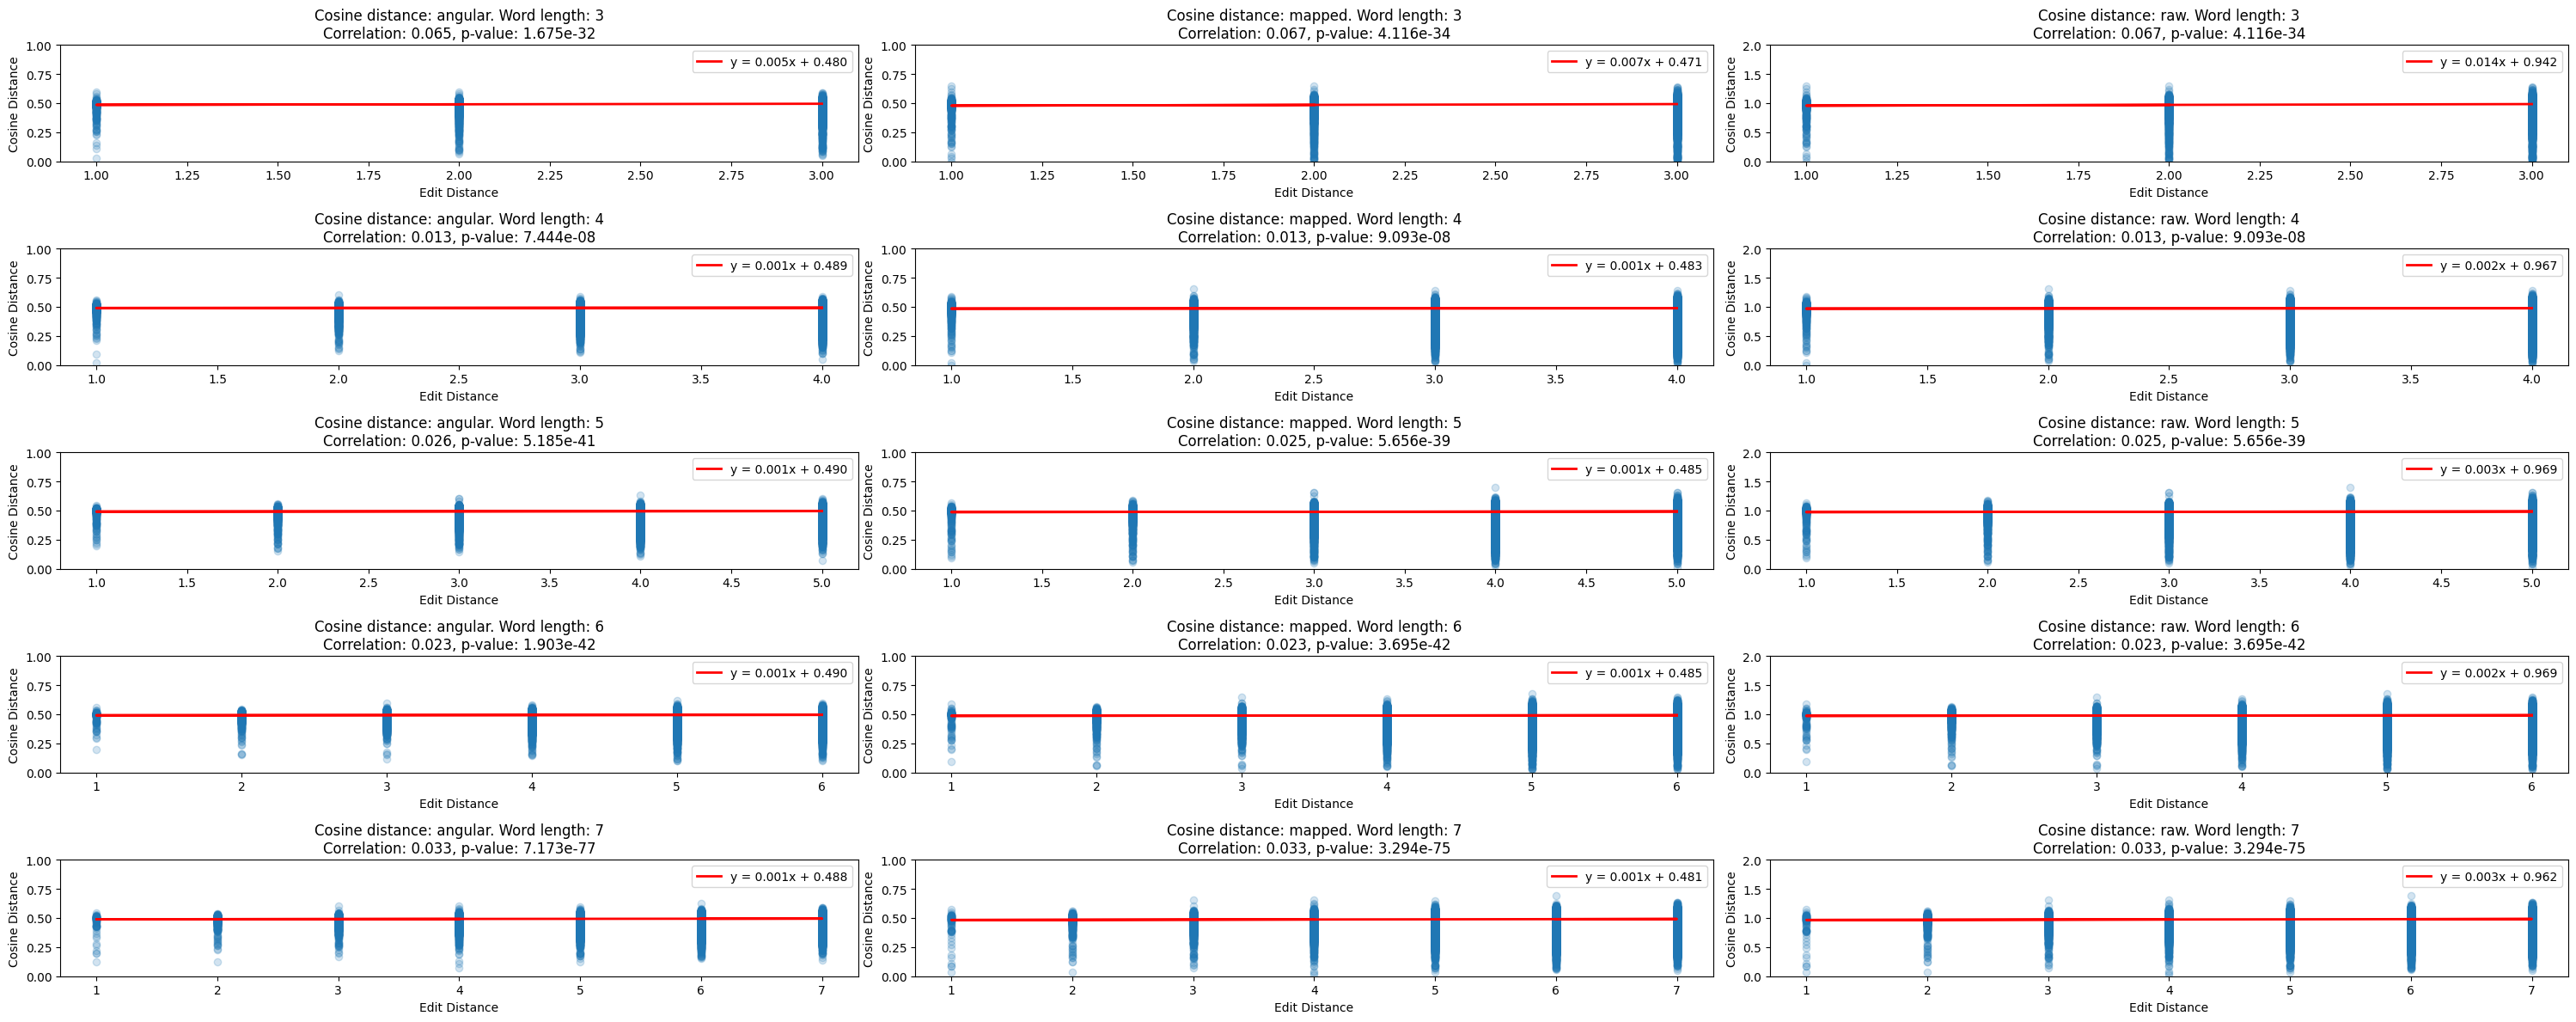

In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def scatterplot_multi(input_dir, output_path, transform=None):
    """
    Generate a grid of scatterplots from CSV files in the specified input directory and save the resulting figure.
    
    Creates a grid of scatterplots, with each row representing a cosine distance type and each column representing a word length.
    The y axes are adjusted to the fit the range of possible values given the type of cosine distance. 
    The scatterplots illustrate the relationship between edit distance and cosine distance, and a linear regression line
    is fitted to each scatterplot. 
    
    Parameters:
    input_dir (str): The path to the input directory. The input directory should contain subdirectories corresponding 
                     to different versions of the cosine distance computation. Each subdirectory should contain 5 CSV 
                     files storing cosine distance and edit distance scores for a given word length (from 3 to 7). 
    output_path (str): The path to save the resulting scatterplot figure.
    
    Raises:
    ValueError: If a subdirectory name does not follow the expected format or if a CSV file name does not contain a word length.
    """
    
    # Get the list of subdirectories containing the CSV files with distance scores
    dirs = os.listdir(input_dir)
    
    # Create a list of lists with the CSV file names from each subdirectory
    # Each inner list contains files for a specific word length across the different cosine distance versions
    csv_files = np.array([[file for file in os.listdir(os.path.join(input_dir, dir))] for dir in dirs]).transpose()
    
    # Determine the number of rows and columns for the plot grid
    plot_cols = len(csv_files[0])  # Number of columns (word lengths)
    plot_rows = len(csv_files)  # Number of rows (cosine distance types)
    
    # Initialize subplots
    fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(6 * plot_rows, 4 * plot_cols))
    
    # Populate the subplots with scatterplots and regression lines
    # Iterate over cosine distance version directories
    for i, dir in enumerate(dirs):
        # Validate directory name and extract cosine distance version
        cos_dist_version_match = re.search(r"^([a-z]+)", dir)
        if cos_dist_version_match is not None:
            cos_dist_version = cos_dist_version_match.group()
        else:
            raise ValueError(f"Directory {dir} has an invalid name. Expected [cos_dist_version]_cos_edit_dist.")
        
        # Get the list of files in the directory
        files = os.listdir(os.path.join(input_dir, dir))
        
        # Iterate over the files
        for j, file in enumerate(files):
            # Validate file name and extract word length
            wordlength_match = re.search(r"\d+", file)
            if wordlength_match is not None:
                wordlength = wordlength_match.group()
            else:
                raise ValueError(f"File {file} does not contain a word length.")
            
            # Get file path and read CSV data
            file_path = os.path.join(input_dir, dir, file)
            contents = pd.read_csv(file_path)
            
            cos_dist_raw = contents['cos_dist']
            
            # If applicable, transform the cosine distance scores
            if transform == 'log':
                cos_dist_to_plot = np.log(cos_dist_raw)
                # Calculate the upper limit of y-axis based on log transformation of maximum original value
                if cos_dist_version == "raw":
                    max_limit = np.log(2)  # Log of max raw value (2) 
                else:
                    max_limit = np.log(1)  # Log of max non-raw value (1)
                # Calculate the lower limit of y-axis based on the minimum transformed value and padding (theoretically, the minimum value will approach -inf)
                min_limit = np.log(np.min(cos_dist_raw)) - 0.1
                # Set y-axis limit based on the log transformation
                axes[j, i].set_ylim(min_limit, max_limit)
            
            elif transform == 'z':
                # Calculate mean and standard deviation
                mean = np.mean(cos_dist_raw)
                std_dev = np.std(cos_dist_raw)
                # Apply z-transform
                cos_dist_to_plot = (cos_dist_raw - mean) / std_dev
                
                # Set y-axis limit based on the typical range for z-scores
                axes[j, i].set_ylim(-3, 3)
            
            else:
                cos_dist_to_plot = cos_dist_raw
                # Set y-axis limit based on raw cosine distances
                if cos_dist_version == "raw":
                    axes[j, i].set_ylim(0, 2)
                else:
                    axes[j, i].set_ylim(0, 1)
            
            edit_dist = contents['edit_dist']
            
            # Calculate Pearson correlation coefficient and p-value
            pearson_corr, p_value = pearsonr(cos_dist_raw, edit_dist)
            
            # Plot scatterplot of cosine distance vs. edit distance
            axes[j, i].scatter(edit_dist, cos_dist_to_plot, alpha=0.2)
            axes[j, i].set_title(
                f"Rescaling of cosine distance: {cos_dist_version}. Word length: {wordlength}\nCorrelation: {pearson_corr:.3f}, p-value: {p_value:.3e}"
            )
            axes[j, i].set_xlabel("Edit Distance")
            axes[j, i].set_ylabel("Cosine Distance")
            
            # Fit and plot linear regression line
            slope, intercept = np.polyfit(edit_dist, cos_dist_to_plot, deg=1)
            regression_line_y = slope * edit_dist + intercept
            axes[j, i].plot(edit_dist, regression_line_y, color='red', linewidth=2, label=f"y = {slope:.3f}x + {intercept:.3f}")
            
            # Add legend for the regression line
            axes[j, i].legend()
    
    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(output_path)

# Usage
os.chdir(r"C:\Users\Raya\OneDrive\Documents\3-CSAI\CSAI-Y3-S2\Thesis\Replication")
input_dir = "results/no_baseline"
output_path = "results/scatter_multi.png"
scatterplot_multi(input_dir, output_path)

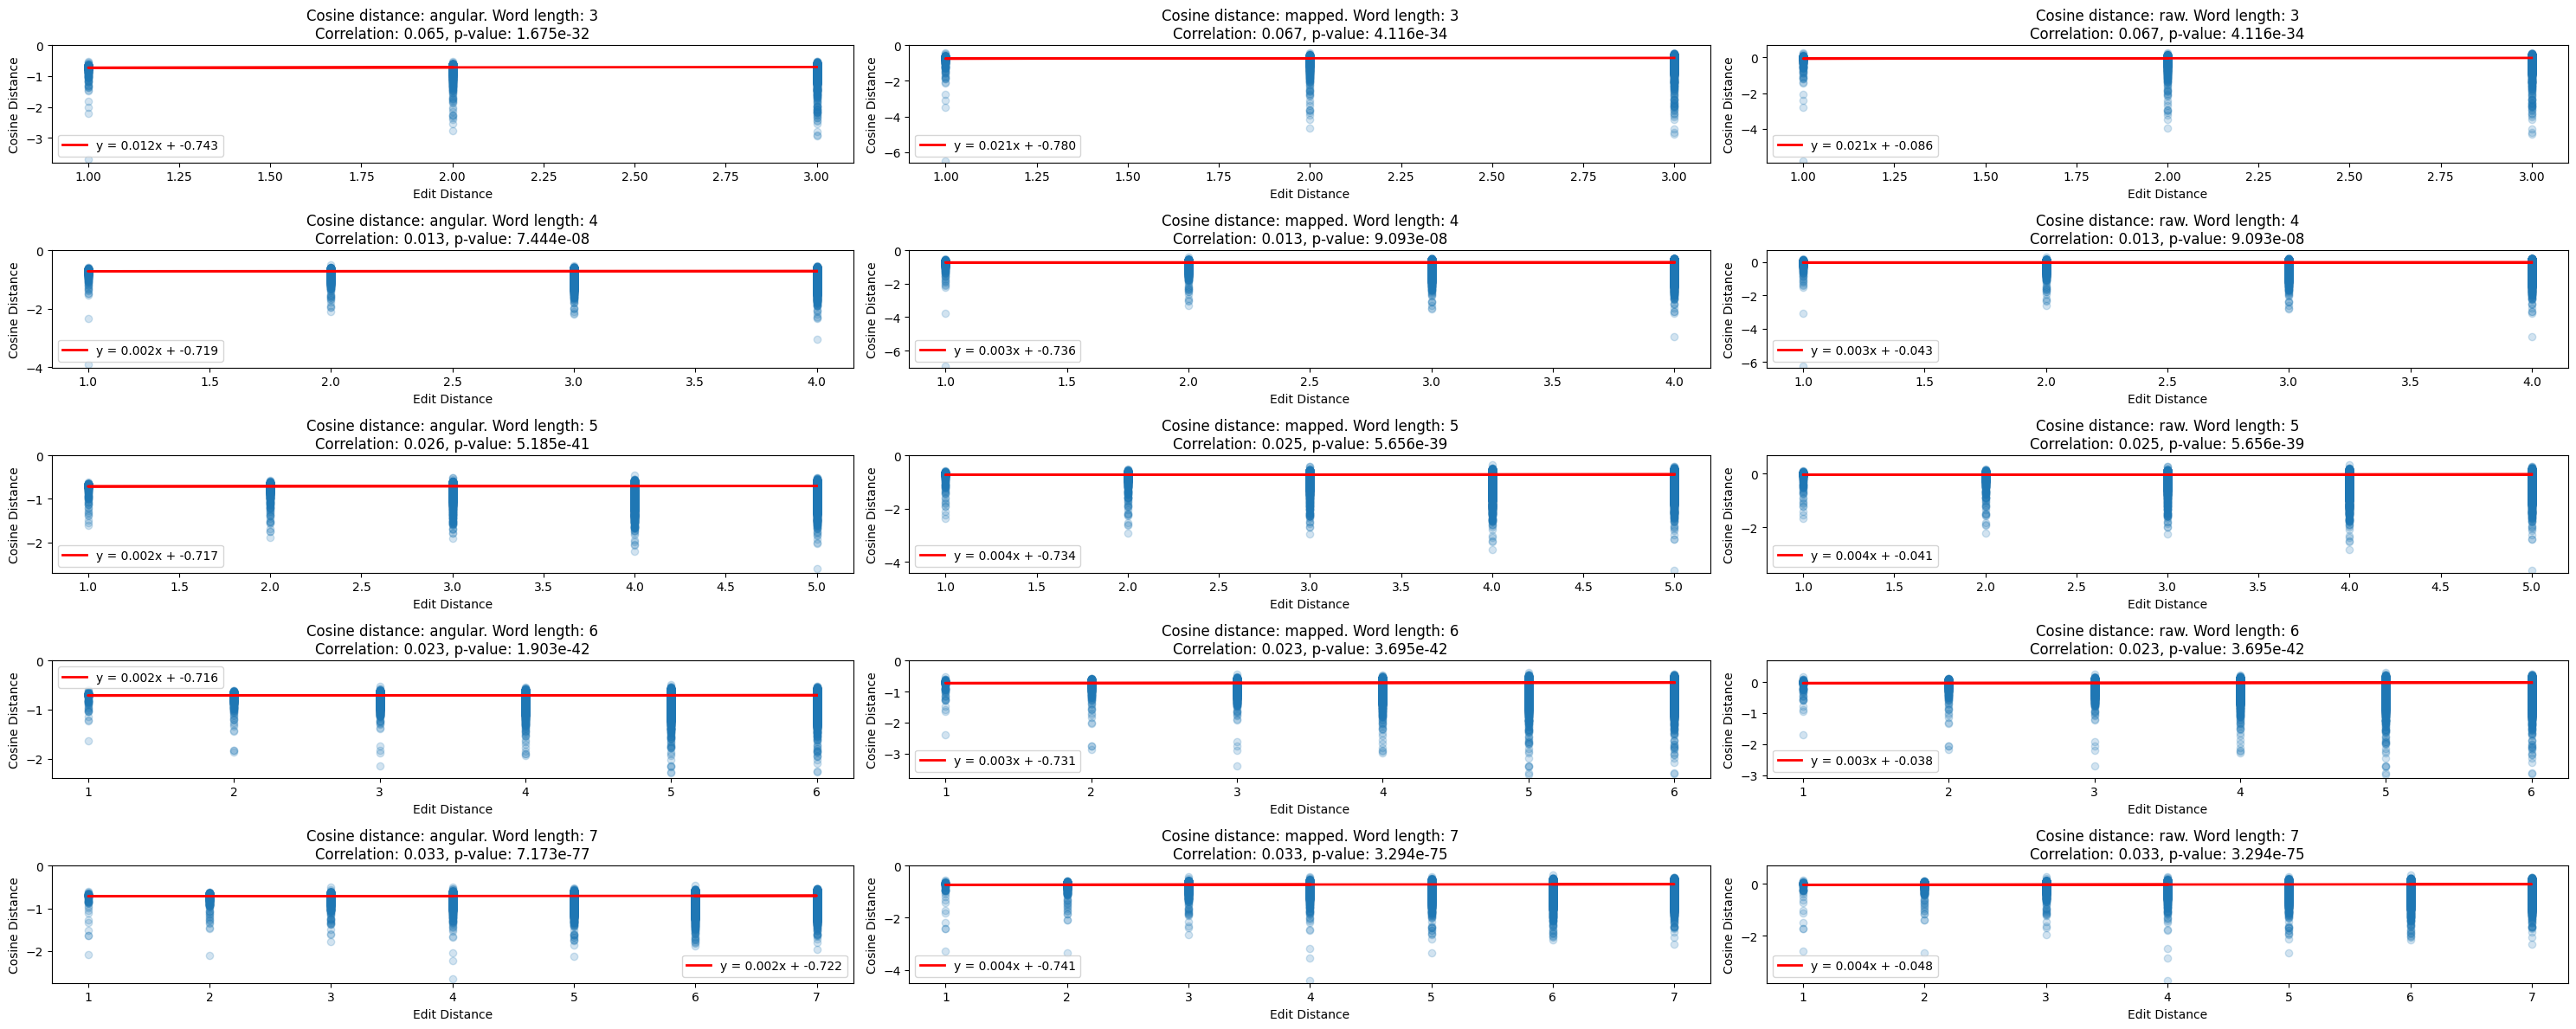

In [4]:
input_dir = "results/no_baseline"
output_path = "results/log_scatter_multi.png"
scatterplot_multi(input_dir, output_path, transform='log')

C:\Users\Raya\AppData\Local\Temp\ipykernel_23280\875267474.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Raya\AppData\Local\Temp\ipykernel_23280\875267474.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(output_path)
C:\Users\Raya\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


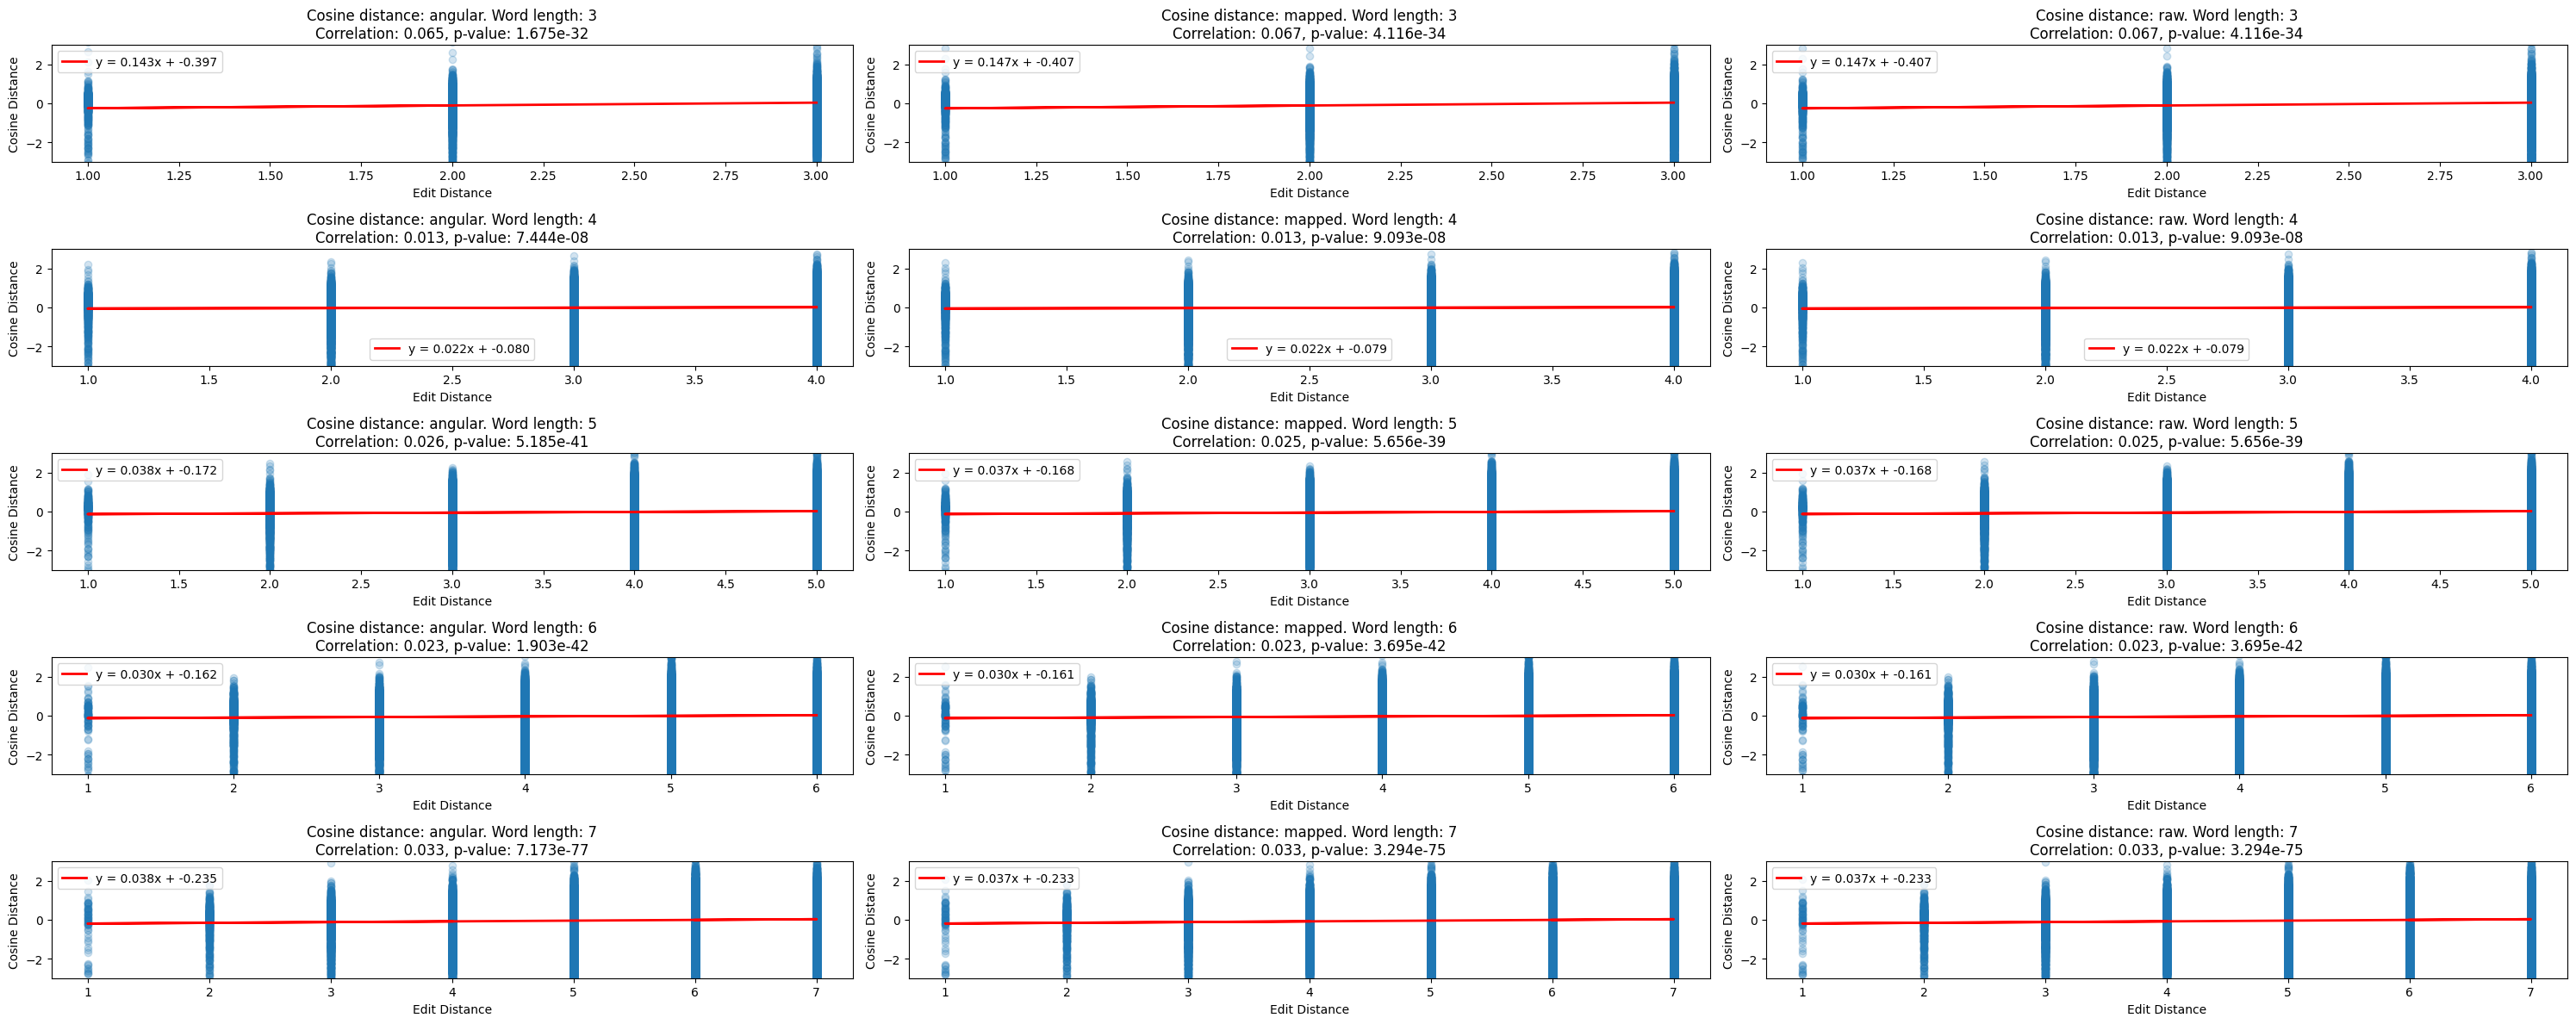

In [5]:
input_dir = "results/no_baseline"
output_path = "results/z_scatter_multi.png"
scatterplot_multi(input_dir, output_path, transform='z')

In [16]:
def scatter_subplots_per_wordlength(input_dir, plot_path, rescaling=None, transform=None, show_or_save='show'):
    # Extract files from input directory
    csv_files = [file for file in os.listdir(os.path.join(input_dir))]
    
    # Determine the number of rows and columns for the plot grid
    plot_cols = 1  # Number of columns 
    plot_rows = len(csv_files)  # Number of rows 
    
    # Initialize subplots
    _, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(2 * plot_rows, 10 * plot_cols))
    
    # Populate the subplots with scatterplots and regression lines
    # Iterate over csv files
    for i, file in enumerate(csv_files):        
        # Validate file name and extract word length
        wordlength_match = re.search(r"\d+", file)
        if wordlength_match is not None:
            wordlength = wordlength_match.group()
        else:
            raise ValueError(f"File {file} does not contain a word length.")
        
        # Get file path and read CSV data
        file_path = os.path.join(input_dir, file)
        contents = pd.read_csv(file_path)
        
        cos_dist_raw = contents['cos_dist']
        
        # If applicable, transform the cosine distance scores
        if transform == 'log':
            cos_dist_to_plot = np.log(cos_dist_raw)
            # Calculate the upper limit of y-axis based on log transformation of maximum original value
            if rescaling == None:
                max_limit = np.log(2)  # Log of max raw value (2) 
            else:
                max_limit = np.log(1)  # Log of max non-raw value (1)
            # Calculate the lower limit of y-axis based on the minimum transformed value and padding (theoretically, the minimum value will approach -inf)
            min_limit = np.log(np.min(cos_dist_raw)) - 0.1
            # Set y-axis limit based on the log transformation
            axes[i].set_ylim(min_limit, max_limit)
        
        elif transform == 'z':
            # Calculate mean and standard deviation
            mean = np.mean(cos_dist_raw)
            std_dev = np.std(cos_dist_raw)
            # Apply z-transform
            cos_dist_to_plot = (cos_dist_raw - mean) / std_dev
            
            # Set y-axis limit based on the typical range for z-scores
            axes[i].set_ylim(-3, 3)
        
        else:
            cos_dist_to_plot = cos_dist_raw
            # Set y-axis limit based on raw cosine distances
            if rescaling == None:
                axes[i].set_ylim(0, 2)
            else:
                axes[i].set_ylim(0, 1)
        
        edit_dist = contents['edit_dist']
        
        # Calculate Pearson correlation coefficient and p-value
        pearson_corr, p_value = pearsonr(cos_dist_raw, edit_dist)
        
        # Plot scatterplot of cosine distance vs. edit distance
        axes[i].scatter(edit_dist, cos_dist_to_plot, alpha=0.2)
        axes[i].set_title(
            f"Rescaling of cosine distance: {rescaling}. Word length: {wordlength}\nCorrelation: {pearson_corr:.3f}, p-value: {p_value:.3e}"
        )
        axes[i].set_xlabel("Edit Distance")
        axes[i].set_ylabel("Cosine Distance")
        
        # Fit and plot linear regression line
        slope, intercept = np.polyfit(edit_dist, cos_dist_to_plot, deg=1)
        regression_line_y = slope * edit_dist + intercept
        axes[i].plot(edit_dist, regression_line_y, color='red', linewidth=2, label=f"y = {slope:.3f}x + {intercept:.3f}")
        
        # Add legend for the regression line
        axes[i].legend()
    
    # Adjust layout and save the plot
    plt.tight_layout()
    if show_or_save == 'show':
        plt.show()
    else:
        plt.savefig(plot_path)

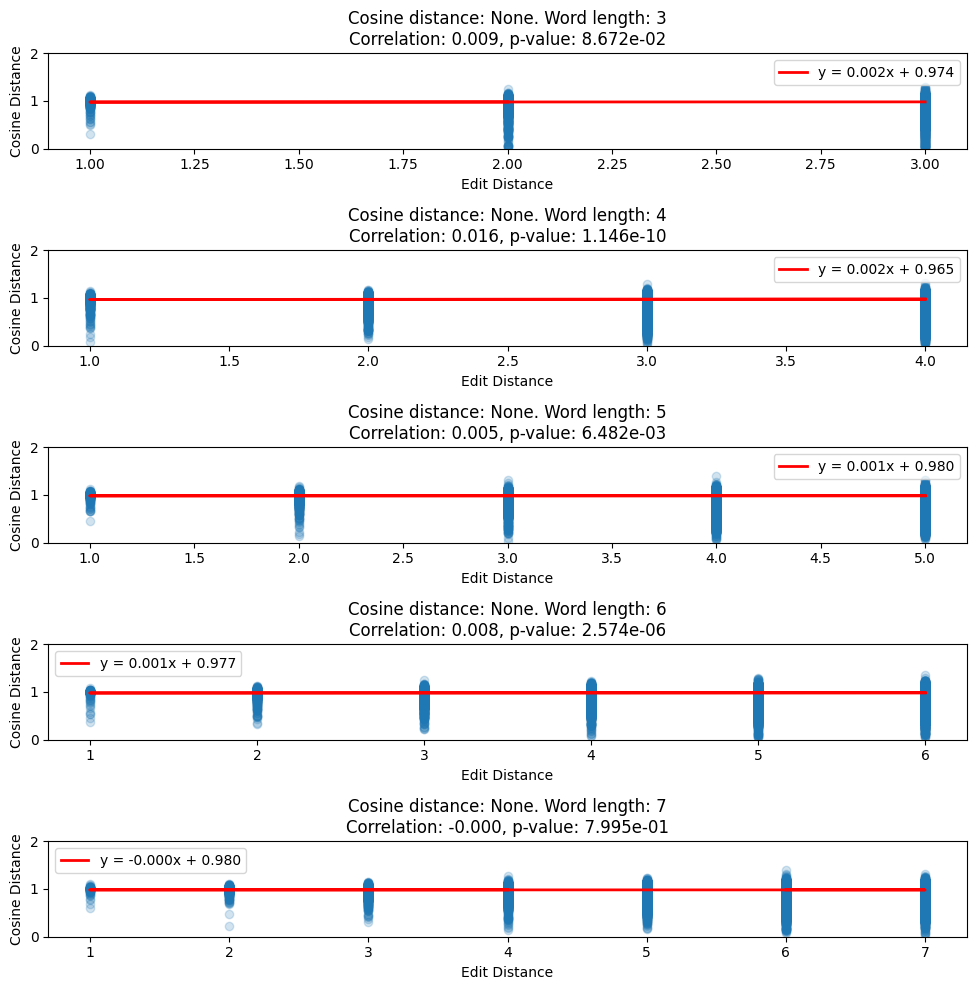

In [15]:
input_dir = "results/bin_baseline_1/cos_edit_dist"
output_path = "results/scatter.png"
scatter_subplots_per_wordlength(input_dir, output_path)

In [2]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def kde_subplots_per_wordlength(input_dir, output_path, transform=None):
    # Get the list of subdirectories containing the CSV files with distance scores
    dirs = os.listdir(input_dir)
    
    # Create a list of lists with the CSV file names from each subdirectory
    # Each inner list contains files for a specific word length across the different cosine distance versions
    csv_files = np.array([[file for file in os.listdir(os.path.join(input_dir, dir))] for dir in dirs]).transpose()
    
    # Determine the number of rows and columns for the plot grid
    plot_cols = len(csv_files[0])  # Number of columns (word lengths)
    plot_rows = len(csv_files)  # Number of rows (cosine distance types)
    
    # Initialize subplots
    fig, axes = plt.subplots(nrows=plot_rows, ncols=plot_cols, figsize=(6 * plot_rows, 4 * plot_cols))
    
    # Populate the subplots with scatterplots and regression lines
    # Iterate over cosine distance version directories
    for i, dir in enumerate(dirs):
        # Validate directory name and extract cosine distance version
        cos_dist_version_match = re.search(r"^([a-z]+)", dir)
        if cos_dist_version_match is not None:
            cos_dist_version = cos_dist_version_match.group()
        else:
            raise ValueError(f"Directory {dir} has an invalid name. Expected [cos_dist_version]_cos_edit_dist.")
        
        # Get the list of files in the directory
        files = os.listdir(os.path.join(input_dir, dir))
        
        # Iterate over the files
        for j, file in enumerate(files):
            # Validate file name and extract word length
            wordlength_match = re.search(r"\d+", file)
            if wordlength_match is not None:
                wordlength = wordlength_match.group()
            else:
                raise ValueError(f"File {file} does not contain a word length.")
            
            # Get file path and read CSV data
            file_path = os.path.join(input_dir, dir, file)
            contents = pd.read_csv(file_path)
            
            cos_dist_raw = contents['cos_dist']
            
            # If applicable, transform the cosine distance scores
            if transform == 'log':
                cos_dist_to_plot = np.log(cos_dist_raw)
                # Calculate the upper limit of y-axis based on log transformation of maximum original value
                if cos_dist_version == "raw":
                    max_limit = np.log(2)  # Log of max raw value (2) 
                else:
                    max_limit = np.log(1)  # Log of max non-raw value (1)
                # Calculate the lower limit of y-axis based on the minimum transformed value and padding (theoretically, the minimum value will approach -inf)
                min_limit = np.log(np.min(cos_dist_raw)) - 0.1
                # Set y-axis limit based on the log transformation
                axes[j, i].set_ylim(min_limit, max_limit)
            
            elif transform == 'z':
                # Calculate mean and standard deviation
                mean = np.mean(cos_dist_raw)
                std_dev = np.std(cos_dist_raw)
                # Apply z-transform
                cos_dist_to_plot = (cos_dist_raw - mean) / std_dev
                
                # Set y-axis limit based on the typical range for z-scores
                axes[j, i].set_ylim(-3, 3)
            
            else:
                cos_dist_to_plot = cos_dist_raw
                # Set y-axis limit based on raw cosine distances
                if cos_dist_version == "raw":
                    axes[j, i].set_ylim(0, 2)
                else:
                    axes[j, i].set_ylim(0, 1)
            
            edit_dist = contents['edit_dist']
            
            # Calculate Pearson correlation coefficient and p-value
            pearson_corr, p_value = pearsonr(cos_dist_raw, edit_dist)
            
            # Plot scatterplot of cosine distance vs. edit distance
            sns.kdeplot(x=edit_dist, y=cos_dist_to_plot, ax=axes[i], shade=True, alpha=0.2)
            axes[j, i].set_title(
                f"Rescaling of cosine distance: {cos_dist_version}. Word length: {wordlength}\nCorrelation: {pearson_corr:.3f}, p-value: {p_value:.3e}"
            )
            axes[j, i].set_xlabel("Edit Distance")
            axes[j, i].set_ylabel("Cosine Distance")
            
            # # Fit and plot linear regression line
            # slope, intercept = np.polyfit(edit_dist, cos_dist_to_plot, deg=1)
            # regression_line_y = slope * edit_dist + intercept
            # axes[j, i].plot(edit_dist, regression_line_y, color='red', linewidth=2, label=f"y = {slope:.3f}x + {intercept:.3f}")
            
            # # Add legend for the regression line
            # axes[j, i].legend()
    
    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig(output_path)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

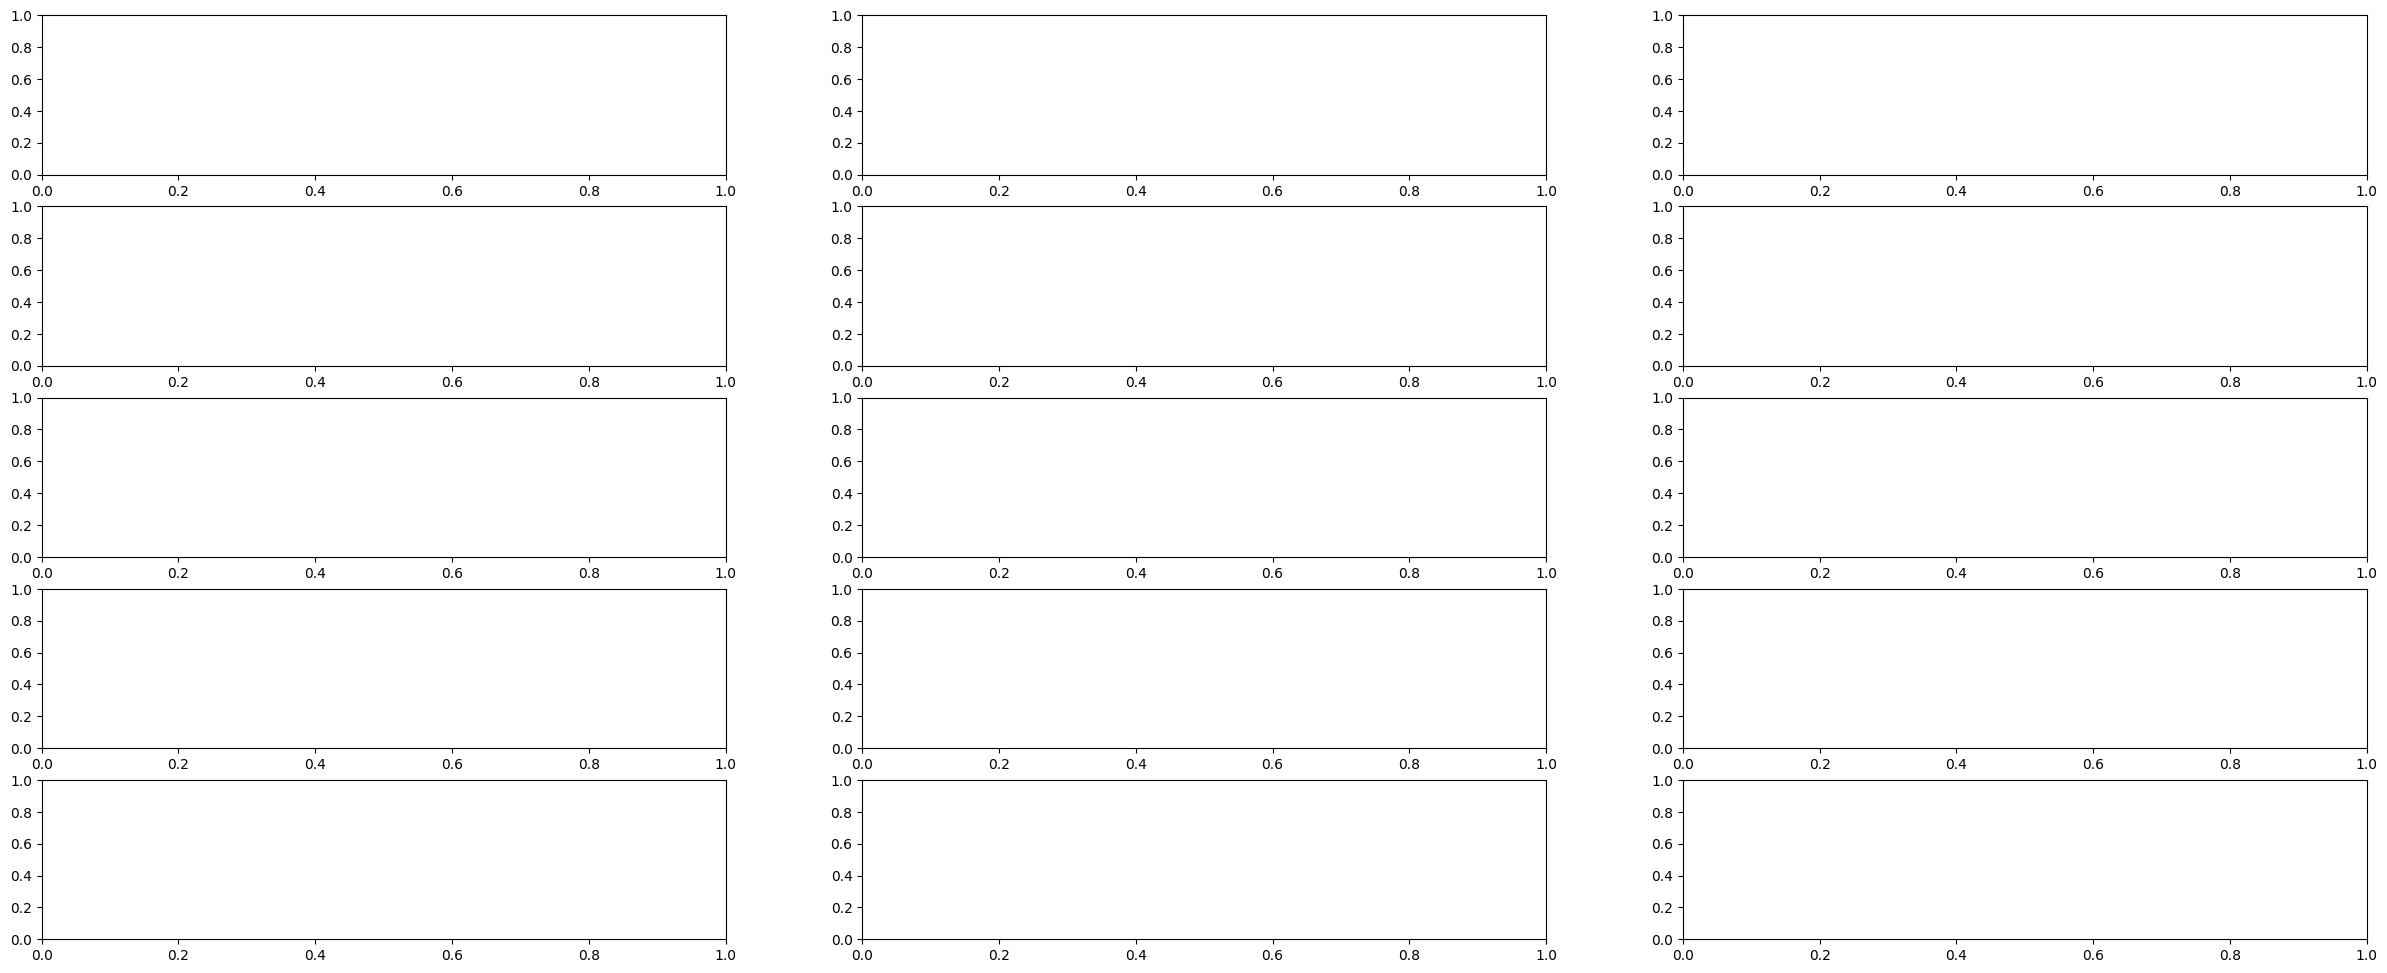

In [3]:
input_dir = "results/no_baseline"
output_path = "results/kde_test_scores.png"
kde_subplots_per_wordlength(input_dir, output_path)